### Citations (APA Style):

- Jakkula, V.R. (2011). Tutorial on Support Vector Machine ( SVM ).

- Auria, Laura and Moro, R. A., Support Vector Machines (SVM) as a Technique for Solvency Analysis (August 1, 2008). DIW Berlin Discussion Paper No. 811, Available at SSRN: https://ssrn.com/abstract=1424949 or http://dx.doi.org/10.2139/ssrn.1424949

[Read more about SVMs by clicking here.](https://scikit-learn.org/stable/modules/svm.html)

Import all required modules

In [26]:
# Add local modules' path
# Restart notebook if you modify these imports' files
import os
import sys

module_path = os.path.abspath(os.path.join("..", "common"))

if module_path not in sys.path:
    sys.path.append(module_path)

# Actual imports
from common import kUtils
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

Get the split data

In [27]:
X_train: np.ndarray; X_test: np.ndarray; X_val: np.ndarray; y_train: np.ndarray; y_test: np.ndarray; y_val: np.ndarray;

X_train, X_test, X_val, y_train, y_test, y_val = kUtils.get_split_data()


In [28]:
model: svm.SVC = svm.SVC(kernel="linear")

classifier: svm.SVC = model.fit(X=X_train, y=y_train)

In [ ]:
score: float = classifier.score(X=X_test, y=y_test)

print(f"SVM score: {score}")

[1. 0. 1. ... 1. 0. 0.]
SVM score: 0.9920714285714286


PC1 explains 98.58% of the variance
PC2 explains 0.31% of the variance
Variance explained by all principal components: 98.89%


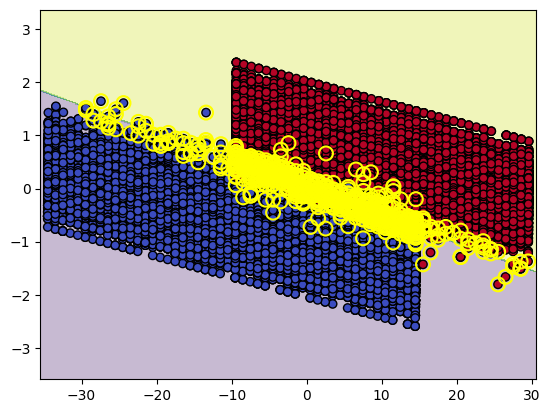

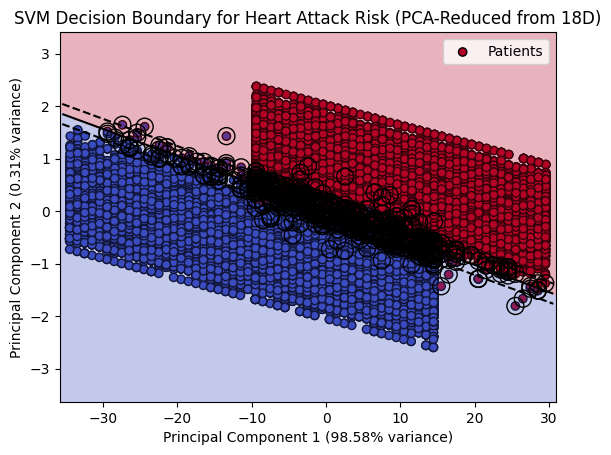

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

pca: PCA = PCA(n_components=2)
X_pca: np.ndarray = pca.fit_transform(X_train)
support_vectors_pca: np.ndarray = pca.transform(classifier.support_vectors_)

explained_variance: np.ndarray = pca.explained_variance_ratio_ * 100
print(f"PC1 explains {explained_variance[0]:.2f}% of the variance")
print(f"PC2 explains {explained_variance[1]:.2f}% of the variance")
print(f"Variance explained by all principal components: {pca.explained_variance_ratio_.sum() * 100:.2f}%")

h: float; x_min: float; x_max: float; y_min: float; y_max: float;

h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx: np.ndarray; yy: np.ndarray;

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z: np.ndarray = classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, label="Data Points")
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], 
            facecolors='none', edgecolors='yellow', linewidths=1.5, s=100, label="Support Vectors")

# Plot decision boundary and margins
svm_pca: svm.SVC = model.fit(X_pca, y_train)  # Train SVM directly on PCA-reduced data

fig, ax = plt.subplots()
# Plot data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, label="Patients")

common_params = {"estimator": svm_pca, "X": X_pca, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    plot_method="pcolormesh",
    alpha=0.3,
)
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)

plt.scatter(
            classifier.support_vectors_[:, 0],
            classifier.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}% variance)')
plt.title('SVM Decision Boundary for Heart Attack Risk (PCA-Reduced from 18D)')
plt.legend()
plt.show()

### Metrics

In [34]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

y_pred: np.ndarray = classifier.predict(X_test)

accuracy: float = accuracy_score(y_true=y_test, y_pred=y_pred)
mse: float | np.ndarray = mean_squared_error(y_true=y_test, y_pred=y_pred)
c_report: str | dict = classification_report(y_true=y_test, y_pred=y_pred)
c_matrix: np.ndarray = confusion_matrix(y_true=y_test, y_pred=y_pred)

print("Accuracy:", accuracy)
print("Mean squared error:", mse)
print("Classification report:\n", c_report)
print("Confusion matrix:\n", c_matrix)

Accuracy: 0.9920714285714286
Mean squared error: 0.007928571428571429
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      7012
         1.0       0.99      0.99      0.99      6988

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000

Confusion matrix:
 [[6953   59]
 [  52 6936]]


In [ ]:
import pandas as pd

feature_list: list[str] = kUtils.get_feature_list()

feature_importance: pd.DataFrame = pd.DataFrame(pca.components_, columns=[feature_list[i] for i in range(len(X_train[0,]))], index=['PC1', 'PC2'])
feature_importance = feature_importance.sort_values(by=["PC1", "PC2"], axis="columns", ascending=False)

print("Feature Contributions to Principal Components:\n", feature_importance.T)


Feature Contributions to Principal Components:
                           PC1       PC2
Age                  0.999277 -0.037977
Shortness_of_Breath  0.011187  0.279895
Pain_Arms_Jaw_Back   0.011173  0.284809
Dizziness            0.011131  0.281516
Palpitations         0.011076  0.284521
Chest_Pain           0.011061  0.281972
Swelling             0.011053  0.280783
Cold_Sweats_Nausea   0.011047  0.280864
Fatigue              0.010908  0.282717
Sedentary_Lifestyle  0.007591  0.203673
High_Cholesterol     0.007465  0.206262
Smoking              0.007457  0.199905
Obesity              0.007456  0.204109
Family_History       0.007365  0.206314
High_BP              0.007284  0.211775
Diabetes             0.007230  0.202336
Chronic_Stress       0.007211  0.210707
Gender               0.005238  0.152761
